# Covid 19 Pandemic in Sri Lanka

## About Covid 19

The coronavirus (COVID-19) pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily.

Till date it has spread across 215 countries infecting more than 173 million people, and killing more than 3.5 million so far. In Sri Lanka, as many as 205K+ COVID-19 cases have been reported so far. Of these, 167K+ have recovered and 1.6K+ have died. COVID19


Corona Virus Explained in Simple Terms:

  - Let's say Kamal got infected yesterday, but he won't know it untill next 14 days
  - Chamara thinks he is healthy but he is infecting 10 persons per day
  - Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
  - These 100 persons think they are healthy but they have already infected 1000 persons
  - No one knows who is healthy or who can infect you
  - All you can do is be responsible, stay in quarentine
  
  
![alt text](https://i.imgur.com/nf2kMhF.jpg)

## Problem Statement:

As of 07th June 2021, Sri Lanka has witnessed 1.7K deaths due to COVID-19. Locally and Globally the Data Scientists are using AI, and machine learning to analyze, predict, and take safety measures against COVID-19. 

### Goal:
Explore the COVID 19 situation in Sri Lanka and model that predicts how the virus could spread across Sri Lanka in the next 15 days, visualize the behaviour in the tourism industry due to COVID-19, and visualize COVID 19 spread across the world



#### Tasks to be performed:

- Analyze the present condition in Sri Lanka
- Collect or scrape data of COVID-19 from websites and APIs
- Figure out the death rate and recover rate in Sri Lanka
- Create different charts to visualize the following: 
 - Total Increase of COVID in Sri Lanka
 - Total Deaths of COVID in Sri Lanka
 - Total PCR test done till date
- Use ARIMA to predict the confirmed cases in Sri Lanka
- Use ARIMA to predict the COVID 19 deaths in Sri Lanka
- Visualize a global Heat Map to identify the global COVID 19 situation

### Importing the libraries

In [37]:
import pandas as pd
import numpy as np
import dateutil
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data
from plotly.subplots import make_subplots
import plotly.express as px
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('fivethirtyeight')
%matplotlib inline
import mpld3
from statsmodels.tsa.arima_model import ARIMA
from datetime import timedelta






#only in jupyter notebook need plotly offline mode
#I still got some error when using Jupyterlab
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)


# 1. Analysing the present condition in Sri Lanka

**How it started in Sri Lanka?:** 

The first **COVID-19** case was reported on 27th January 2020 when a tourist arrived **Colombo** from China.
For almost a month, no new cases were reported in Sri Lanka,
however, on 3rd March 2020, one new case of corona virus were reported and since then the cases 
have been rising affecting **25** districts, till now 
 <br>


### How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


# 2. Collect or scrape data of COVID-19 from websites and APIs

In [3]:

#loading data
total_confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='utf-8',na_values=None)
#Replace US with United States
total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)
total_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',encoding='utf-8',na_values=None)
total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)
total_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',encoding='utf-8',na_values=None)
total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)

In [4]:
total_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921


In [7]:
#grouped total confirmed data
grouped_total_confirmed = total_confirmed[["Country/Region",total_confirmed.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_confirmed.columns[-1], ascending=False)
grouped_total_confirmed.reset_index(inplace=True)
grouped_total_confirmed.columns=["Country/Region", 'confirmed']
grouped_total_confirmed.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_confirmed_values=grouped_total_confirmed["confirmed"].values.tolist()
country_names=grouped_total_confirmed["Country/Region"].values.tolist()
grouped_total_confirmed.head()

,Country/Region,confirmed
0,United States,33486038
1,India,29633105
2,Brazil,17533221
3,France,5806255
4,Turkey,5342028


In [8]:
#global time series confirmed data frame
global_confirmed_timeseries = pd.DataFrame(total_confirmed[total_confirmed.columns[4:]].sum())
global_confirmed_timeseries.reset_index(inplace=True)
global_confirmed_timeseries.columns= ['date', 'total confirmed']

#global daily new cases = global daily confirmed at date (t) -  global daily confirmed at date (t-1)
global_confirmed_timeseries["daily new cases"] = global_confirmed_timeseries['total confirmed'] - global_confirmed_timeseries['total confirmed'].shift()
global_confirmed_timeseries=global_confirmed_timeseries.fillna(0)
global_confirmed_timeseries.head()

,date,total confirmed,daily new cases
0,1/22/20,557,0.0
1,1/23/20,655,98.0
2,1/24/20,941,286.0
3,1/25/20,1433,492.0
4,1/26/20,2118,685.0


In [9]:
#grouped total recovered data
grouped_total_recovered = total_recovered[["Country/Region",total_recovered.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_recovered.columns[-1], ascending=False)
grouped_total_recovered.reset_index(inplace=True)
grouped_total_recovered.columns=["Country/Region", 'recovered']
grouped_total_recovered.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_recovered_values=grouped_total_recovered["recovered"].values.tolist()
country_names=grouped_total_confirmed["Country/Region"].values.tolist()
grouped_total_recovered.head()

,Country/Region,recovered
0,India,28388100
1,Brazil,15519955
2,Turkey,5211022
3,Russia,4762583
4,Italy,4014025


In [11]:
#global time series recovered data frame
global_recovered_timeseries = pd.DataFrame(total_recovered[total_recovered.columns[4:]].sum())
global_recovered_timeseries.reset_index(inplace=True)
global_recovered_timeseries.columns= ['date', 'total recovered']

#global daily recovered = global daily recovered at date (t) -  global daily recovered at date (t-1)
global_recovered_timeseries["daily new recovered"] = global_recovered_timeseries['total recovered'] - global_recovered_timeseries['total recovered'].shift()
global_recovered_timeseries=global_recovered_timeseries.fillna(0)
global_recovered_timeseries.head()

,date,total recovered,daily new recovered
0,1/22/20,30,0.0
1,1/23/20,32,2.0
2,1/24/20,39,7.0
3,1/25/20,42,3.0
4,1/26/20,56,14.0


In [12]:
# grouping the data by each country to get total confirmed cases
grouped_total_death = total_death[["Country/Region",total_death.columns[-1]]].groupby("Country/Region").sum().sort_values(by=total_death.columns[-1], ascending=False)
grouped_total_death.reset_index(inplace=True)
grouped_total_death.columns=["Country/Region", 'deaths']
grouped_total_death.replace(to_replace='US', value='United States', regex=True, inplace=True)

#Chart.js can't plot dataframe object, so we need to change some to list
barplot_death_values=grouped_total_death["deaths"].values.tolist()
global_death_timeseries = total_death[total_death.columns[4:]].sum()

In [14]:
#global time series death data frame
global_death_timeseries = pd.DataFrame(total_death[total_death.columns[4:]].sum())
global_death_timeseries.reset_index(inplace=True)
global_death_timeseries.columns= ['date', 'total deaths']

#global daily deaths = global daily deaths at date (t) -  global daily deaths at date (t-1)
global_death_timeseries["daily new deaths"] = global_death_timeseries['total deaths'] - global_death_timeseries['total deaths'].shift()
global_death_timeseries=global_death_timeseries.fillna(0)
global_death_timeseries.head()


,date,total deaths,daily new deaths
0,1/22/20,17,0.0
1,1/23/20,18,1.0
2,1/24/20,26,8.0
3,1/25/20,42,16.0
4,1/26/20,56,14.0


In [15]:
#merge all the data to get full time series dataframe
timeseries_final=pd.merge(global_confirmed_timeseries,global_recovered_timeseries,how='inner',on='date')
timeseries_final = pd.merge(timeseries_final,global_death_timeseries,how='inner',on='date')
timeseries_final.head()

,date,total confirmed,daily new cases,total recovered,daily new recovered,total deaths,daily new deaths
0,1/22/20,557,0.0,30,0.0,17,0.0
1,1/23/20,655,98.0,32,2.0,18,1.0
2,1/24/20,941,286.0,39,7.0,26,8.0
3,1/25/20,1433,492.0,42,3.0,42,16.0
4,1/26/20,2118,685.0,56,14.0,56,14.0


In [16]:
# total confirmed cases globally
total_confirmed[total_confirmed.columns[-1]].sum()

176643833

In [17]:
# total recovered cases globally
total_recovered[total_recovered.columns[-1]].sum()


114800575

In [18]:
# total recovered cases globally
total_death[total_death.columns[-1]].sum()

3822698

In [19]:
# I need data that contain population for each country to calculate confirmed cases/population
# I download it from : https://github.com/samayo/country-json/blob/master/src/country-by-population.json
df_pop = pd.read_json('https://raw.githubusercontent.com/samayo/country-json/master/src/country-by-population.json')
df_pop.head()

,country,population
0,Afghanistan,37172386
1,Albania,2866376
2,Algeria,42228429
3,American Samoa,55465
4,Andorra,77006


In [20]:
#some country name has different  format, so I need to change it to match my first dataset
df_pop.columns=['Country/Region','population']
df_pop=df_pop.replace(to_replace='Russian Federation', value='Russia')


In [21]:
# I also need country code for geographical analysis, Altair need numerical code and Plotly need alfabetical code
#country code and id for later geographical analysis
url = "https://gist.githubusercontent.com/komasaru/9303029/raw/9ea6e5900715afec6ce4ff79a0c4102b09180ddd/iso_3166_1.csv"
country_code = pd.read_csv(url)
country_code = country_code[["English short name","Alpha-3 code","Numeric"]]
country_code.columns=["Country/Region", "code3", "id"]

#Change the data for later merging
#If not match the value will be deleted, so we need to make sure each country name from each table has same value
country_code=country_code.replace(to_replace='Russian Federation (the)', value='Russia')
country_code=country_code.replace(to_replace='United Kingdom (the)', value='United Kingdom')
country_code=country_code.replace(to_replace='United States (the)', value='United States')
country_code=country_code.replace(to_replace='Viet Nam', value='Vietnam')
country_code.head()

,Country/Region,code3,id
0,Afghanistan,AFG,4
1,Åland Islands,ALA,248
2,Albania,ALB,8
3,Algeria,DZA,12
4,American Samoa,ASM,16


In [22]:
# merge them all
final_df=pd.merge(grouped_total_confirmed,grouped_total_recovered,how='inner',on='Country/Region')
final_df=pd.merge(final_df,grouped_total_death,how='inner',on='Country/Region')
final_df=pd.merge(final_df,df_pop,how='inner',on='Country/Region')
final_df=pd.merge(country_code,final_df,how='inner',on='Country/Region')
final_df = final_df.sort_values(by="confirmed", ascending=False)
final_df.reset_index(inplace=True, drop=True)
final_df.to_json("new_map.json")
final_df.head()

,Country/Region,code3,id,confirmed,recovered,deaths,population
0,United States,USA,840,33486038,0,600285,326687501
1,India,IND,356,29633105,28388100,379573,1352617328
2,Brazil,BRA,76,17533221,15519955,490696,209469333
3,France,FRA,250,5806255,400260,110692,66977107
4,Turkey,TUR,792,5342028,5211022,48879,82319724


# 3. Figure out the death rate and recover rate in Sri Lanka

In [23]:
# calculate cases/million and total death rate
final_df['cases/million'] = ((final_df['confirmed']/final_df['population'])*1000000).round(2)
final_df['death rate(%)'] = ((final_df['deaths']/final_df['confirmed'])*100).round(2)
final_df.head()

,Country/Region,code3,id,confirmed,recovered,deaths,population,cases/million,death rate(%)
0,United States,USA,840,33486038,0,600285,326687501,102501.74,1.79
1,India,IND,356,29633105,28388100,379573,1352617328,21907.97,1.28
2,Brazil,BRA,76,17533221,15519955,490696,209469333,83703.04,2.80
3,France,FRA,250,5806255,400260,110692,66977107,86690.14,1.91
4,Turkey,TUR,792,5342028,5211022,48879,82319724,64893.66,0.91


In [24]:
# function to filter timeseries analysis by country
# I use "case" variable just for column name: e.g, case = confirmed, case = deaths
def get_by_country(df, country, case):
    mask = (df['Country/Region'] == country) 
    df = df.loc[mask]
    df_country = df.groupby("Country/Region").sum()
    df_country = pd.DataFrame(df[df.columns[4:]].sum())
    df_country.reset_index(inplace=True)
    df_country.columns=['date', f"value_{case}"]
    df_country[f"daily_new_{case}"] = df_country[f"value_{case}"] - df_country[f"value_{case}"].shift()
    df_country=df_country.fillna(0)
    return df_country


#use function above to get merged dataframe
def get_by_country_merged(total_confirmed, total_death, total_recovered, country):
    #apply to each timeseries
    country_confirmed_tseries = get_by_country(total_confirmed, country, "confirmed" )
    country_death_tseries = get_by_country(total_death, country, "death" )
    country_recovered_tseries = get_by_country(total_recovered, country, "recovered" )
    
    #merge them all
    country_timeseries_final=pd.merge(country_confirmed_tseries,country_death_tseries,how='inner',on='date')
    country_timeseries_final = pd.merge(country_timeseries_final,country_recovered_tseries,how='inner',on='date')
    country_timeseries_final.reset_index(inplace=True)
    return country_timeseries_final

In [26]:
#example for China:
country_tseries = get_by_country(total_confirmed, "China", "confirmed")
# it will give me total confirmed cases per day in US, also I can use this for total_deaths and total_recovered too
country_tseries.head()

,date,value_confirmed,daily_new_confirmed
0,1/22/20,548,0.0
1,1/23/20,643,95.0
2,1/24/20,920,277.0
3,1/25/20,1406,486.0
4,1/26/20,2075,669.0


In [27]:
#example merged for US:
US_ts = get_by_country_merged(total_confirmed, total_death, total_recovered, "China")
US_ts

,index,date,value_confirmed,daily_new_confirmed,value_death,daily_new_death,value_recovered,daily_new_recovered
0,0,1/22/20,548,0.0,17,0.0,28,0.0
1,1,1/23/20,643,95.0,18,1.0,30,2.0
2,2,1/24/20,920,277.0,26,8.0,36,6.0
3,3,1/25/20,1406,486.0,42,16.0,39,3.0
4,4,1/26/20,2075,669.0,56,14.0,49,10.0
...,...,...,...,...,...,...,...,...
506,506,6/11/21,103320,35.0,4846,0.0,97956,18.0
507,507,6/12/21,103357,37.0,4846,0.0,97979,23.0
508,508,6/13/21,103380,23.0,4846,0.0,97993,14.0
509,509,6/14/21,103401,21.0,4846,0.0,98003,10.0


# 4. Create different charts to visualizing

In [28]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
sl_confirmed_df = pd.DataFrame(confirmed_df.loc[[236]])

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
cols = sl_confirmed_df.keys()

sl_deaths_df = pd.DataFrame(deaths_df.loc[[236]])
sl_confirmed = sl_confirmed_df.loc[:, cols[4]:cols[-1]]
sl_deaths = sl_deaths_df.loc[:, cols[4]:cols[-1]]

dates = sl_confirmed.keys()

In [29]:

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append([data[i][0],data[0][1]])
        else:
            d.append([data[i][0],data[i][1]-data[i-1][1]])
    return d 


    
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append([(datetime.datetime.strptime(i, '%m/%d/%y')).date(),confirmed_df[confirmed_df['Country/Region']==country_name][i].sum()])
        country_deaths.append([(datetime.datetime.strptime(i, '%m/%d/%y')).date(),deaths_df[deaths_df['Country/Region']==country_name][i].sum()])
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)

    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    return ( country_cases, country_daily_increase, country_daily_death, country_name)

In [30]:
country_cases, country_daily_increase, country_daily_death, country_name = country_visualizations('Sri Lanka')

<AxesSubplot:>

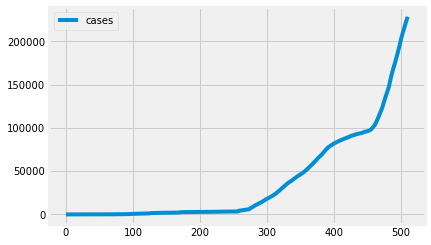

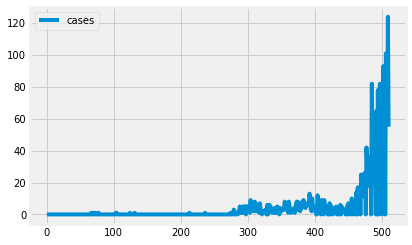

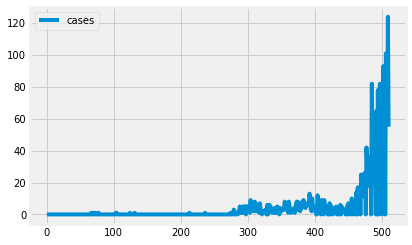

In [39]:
country_cases_df = pd.DataFrame(country_cases, columns=['Date','cases'])
country_daily_increase_df = pd.DataFrame(country_daily_increase, columns=['Date','cases'])
country_daily_death_df = pd.DataFrame(country_daily_death, columns=['Date','cases'])

country_cases_df.plot()
country_daily_death_df.plot()
country_daily_death_df.plot()

# 5. Use ARIMA to predict the confirmed cases in Sri Lanka

/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




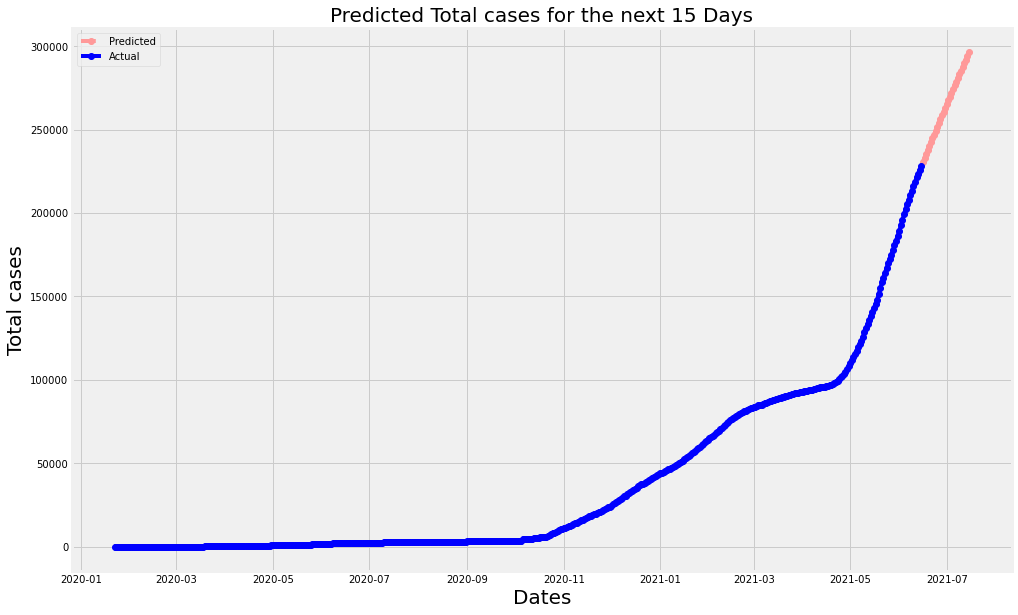

In [40]:
arima = ARIMA(country_cases_df['cases'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = country_cases_df['Date'].iloc[-1]
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

fig=plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Total cases for the next 15 Days" , fontsize = 20)

obj, = plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
obj, = plt.plot_date(y=country_cases_df['cases'],x=country_cases_df['Date'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();


html_str = mpld3.fig_to_html(fig)
mpld3.save_html(fig,"figure1.html")

#Html_file= open("index.html","w")
#Html_file.write(html_str)
#Html_file.close()

# 6. Use ARIMA to predict the COVID 19 deaths in Sri Lanka

/home/manodya/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




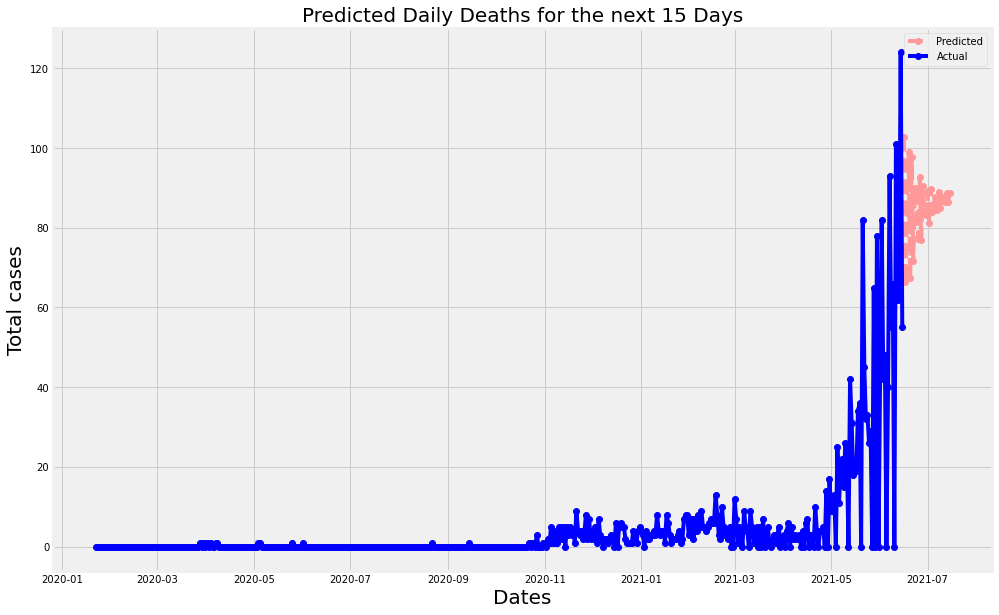

In [41]:

arima = ARIMA(country_daily_death_df['cases'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = country_daily_death_df['Date'].iloc[-1]
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
fig=plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Daily Deaths for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=country_daily_death_df['cases'],x=country_daily_death_df['Date'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

html_str = mpld3.fig_to_html(fig)
mpld3.save_html(fig,"figure2.html")
#plt.savefig('test.png')


# 7. Visualize a global Heat Map to identify the global COVID 19 situation

In [43]:
#Plot Altair 7 geographical analysis; ref : https://github.com/altair-viz/altair/issues/2044
import altair as alt
from vega_datasets import data
world_source = final_df

source = alt.topo_feature(data.world_110m.url, "countries")
background = alt.Chart(source).mark_geoshape(fill="white")

foreground = (
    alt.Chart(source)
    .mark_geoshape(stroke="black", strokeWidth=0.15)
    .encode(
        color=alt.Color(
            "confirmed:N", scale=alt.Scale(scheme="redpurple"), legend=None,
        ),
        tooltip=[
            alt.Tooltip("Country/Region:N", title="Country"),
            alt.Tooltip("confirmed:Q", title="confirmed cases"),
        ],
    
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(world_source, "id", ["confirmed", "Country/Region"]),
    )
)

final_map = (
    (background + foreground)
    .configure_view(strokeWidth=0)
    .properties(width=700, height=400)
    .project("naturalEarth1")
)
final_map

alt.LayerChart(...)